# Library



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt # for data visualization
import seaborn as sb # for statistical data visualization
%matplotlib inline
import plotly.express as px
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

# Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving druggie.csv to druggie.csv


In [ ]:
df = pd.read_csv("druggie.csv")

In [ ]:
df.head(5)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [ ]:
df.columns

Index(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'drug_approved_by_UIC',
       'number_of_times_prescribed', 'base_score'],
      dtype='object')

In [ ]:
# drop data yang tidak diperlukan
df = df.drop(['patient_id', 'drug_approved_by_UIC', 'base_score'], axis = 1)
df.head(5)

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,number_of_times_prescribed
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17
3,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37
4,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,43


In [ ]:
df.count()

name_of_drug                  32165
use_case_for_drug             32165
review_by_patient             32165
effectiveness_rating          32165
number_of_times_prescribed    32165
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   name_of_drug                32165 non-null  object
 1   use_case_for_drug           32165 non-null  object
 2   review_by_patient           32165 non-null  object
 3   effectiveness_rating        32165 non-null  int64 
 4   number_of_times_prescribed  32165 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.2+ MB


In [ ]:
df.notna() #filtering untuk data yang tidak null

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,number_of_times_prescribed
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
32160,True,True,True,True,True
32161,True,True,True,True,True
32162,True,True,True,True,True
32163,True,True,True,True,True


In [ ]:
df.isnull().sum() #pemeriksaan data null

name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
number_of_times_prescribed    0
dtype: int64

In [ ]:
df.describe()

,effectiveness_rating,number_of_times_prescribed
count,32165.000000,32165.000000
mean,6.998912,27.893207
std,3.274781,35.819035
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,771.000000


In [ ]:
df['effectiveness_rating'].value_counts()

10    10252
9      5429
1      4295
8      3786
7      1832
5      1581
2      1422
6      1289
3      1267
4      1012
Name: effectiveness_rating, dtype: int64

In [ ]:
df1 = df.iloc[:, 3:5]
df1

,effectiveness_rating,number_of_times_prescribed
0,9,27
1,8,192
2,5,17
3,9,37
4,2,43
...,...,...
32160,9,89
32161,6,0
32162,9,25
32163,8,22


# EDA

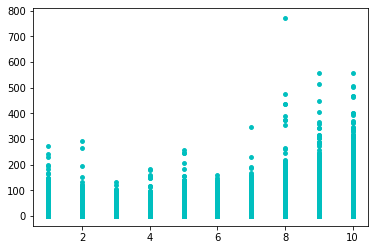

In [ ]:
plt.scatter(df.effectiveness_rating , df.number_of_times_prescribed, s = 15, c = "c", marker = "o", alpha = 1)
plt.show()

Text(0, 0.5, 'Number of times')

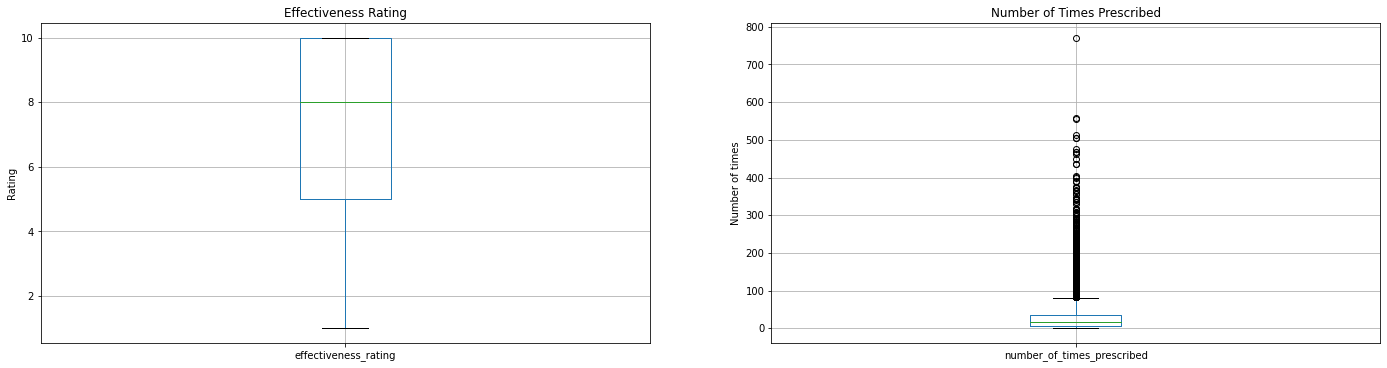

In [ ]:
plt.figure(figsize=(24,20))
plt.subplot(3,2,1)
fig = df1.boxplot(column = 'effectiveness_rating')
fig.set_title('Effectiveness Rating')
fig.set_ylabel('Rating')

plt.subplot(3,2,2)
fig1 = df1.boxplot(column = 'number_of_times_prescribed') #Berapa kali obat diresepkan
fig1.set_title('Number of Times Prescribed')
fig1.set_ylabel('Number of times')

Skewness:  -0.7991705524428825
Kurtosis:  -0.8898997499874426


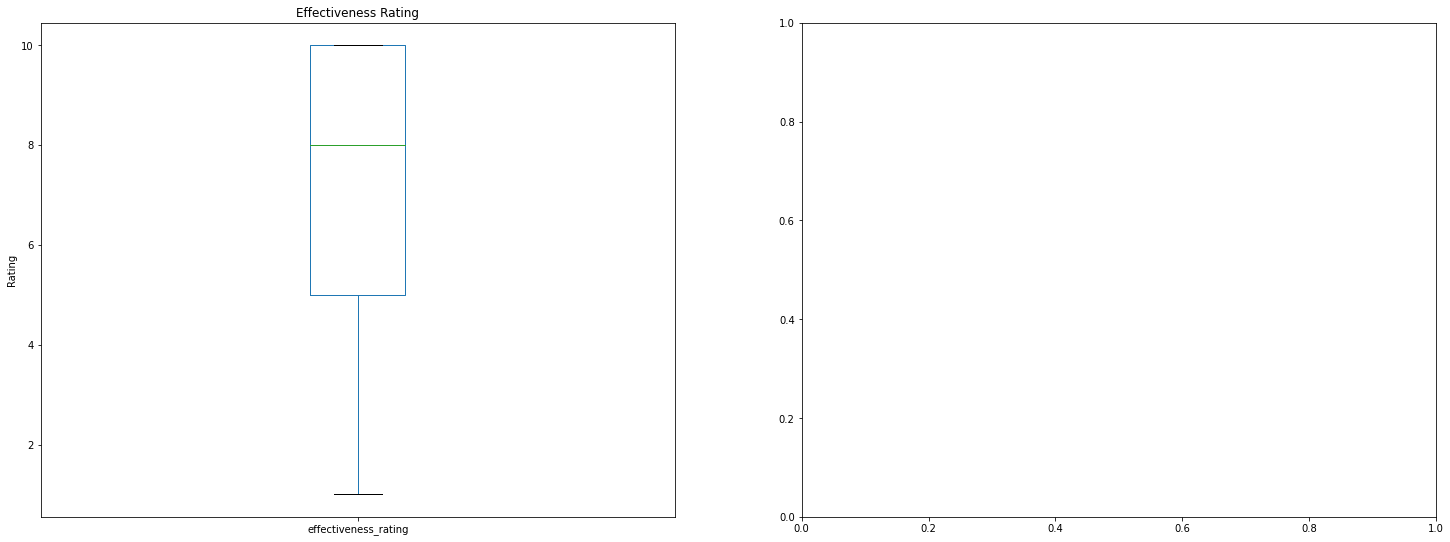

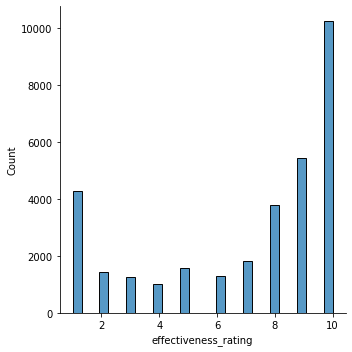

In [ ]:
#Visualsasi bloxplot dan Skewness dari feature dengan tipe data numeric
plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
fig = df1.boxplot(column = 'effectiveness_rating', grid=False)
fig.set_title('Effectiveness Rating')
fig.set_ylabel('Rating')
plt.subplot(2,2,2)

sb.displot(df1['effectiveness_rating'])
print("Skewness: ", df1['effectiveness_rating'].skew())
print("Kurtosis: ", df1['effectiveness_rating'].kurt())

Skewness:  3.7881555667782085
Kurtosis:  28.768900383299513


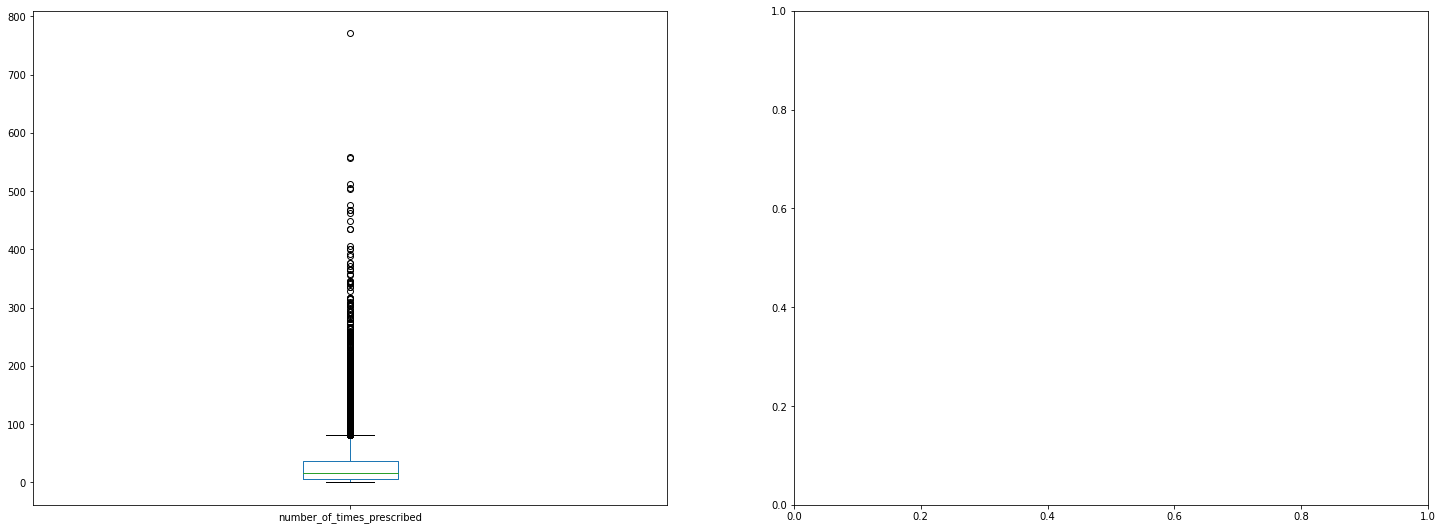

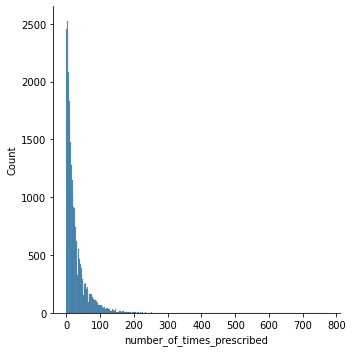

In [ ]:
plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
fig = df1.boxplot(column = 'number_of_times_prescribed', grid=False)
fig1.set_title('Number of Times Prescribed')
fig1.set_ylabel('Number of Times Prescribed')
plt.subplot(2,2,2)

sb.displot(df1['number_of_times_prescribed'])
print("Skewness: ", df1['number_of_times_prescribed'].skew())
print("Kurtosis: ", df1['number_of_times_prescribed'].kurt())

# K-Means

In [ ]:
druggie_scaled = df1.copy()
cols_scale = ['effectiveness_rating', 'number_of_times_prescribed']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

druggie_scaled[cols_scale] = scaler.fit_transform(druggie_scaled[cols_scale])

In [ ]:
druggie_scaled[cols_scale].head()

,effectiveness_rating,number_of_times_prescribed
0,0.611070,-0.024937
1,0.305701,4.581624
2,-0.610405,-0.304123
3,0.611070,0.254248
4,-1.526511,0.421760


In [ ]:
from sklearn.cluster import KMeans
cluster_cols = ['effectiveness_rating', 'number_of_times_prescribed']
markers = ['+', '*', '.', '|', 'x', '1', '2']

<Figure size 1296x864 with 0 Axes>

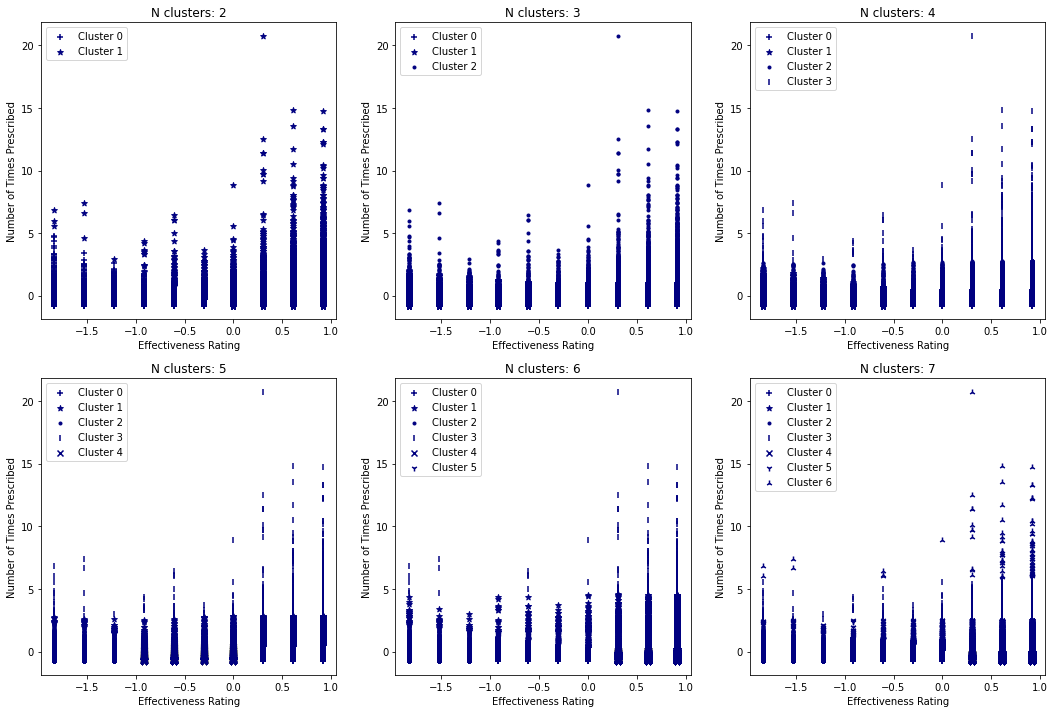

In [ ]:
plt.figure(figsize=[18,12])
for n in range(2,8):
    model = KMeans(n_clusters=n, random_state=10)
    druggie_scaled['Cluster']= model.fit_predict(druggie_scaled[cluster_cols])

plt.figure(figsize=[18,12])
for n in range(2,8):
    model = KMeans(n_clusters=n, random_state=10)
    druggie_scaled['Cluster']= model.fit_predict(druggie_scaled[cluster_cols])
    

    plt.subplot(2,3, n-1)
    for clust in range(n):
        temp = druggie_scaled[druggie_scaled.Cluster == clust]
        plt.scatter(temp.effectiveness_rating, temp.number_of_times_prescribed, \
                marker=markers[clust], \
                label="Cluster "+str(clust), color='navy')
        plt.title("N clusters: "+str(n))
        plt.xlabel('Effectiveness Rating')
        plt.ylabel('Number of Times Prescribed')
        plt.legend()

# Modelling

**Elbow**

In [ ]:
import sklearn.cluster as cluster

In [ ]:
K = range(1,18)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df1)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [ ]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,4.161145e+07
1,2,1.709929e+07
2,3,9.687292e+06
3,4,6.219096e+06
4,5,4.190672e+06
5,6,3.108237e+06
6,7,2.447087e+06
7,8,1.951955e+06
8,9,1.650539e+06
9,10,1.408300e+06


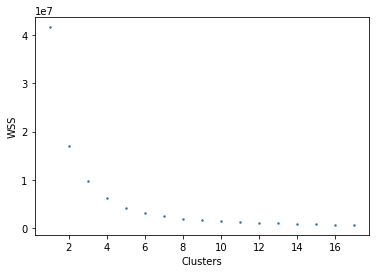

In [ ]:
sb.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker=".")

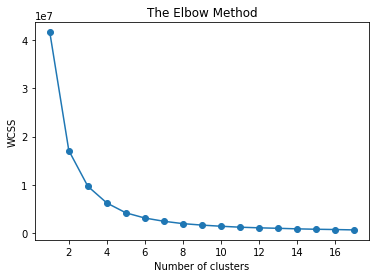

In [ ]:
# Elbow Method
X = df1.select_dtypes(include= 'number')

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 18), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Menurut grafik pada Metode Elbow, Hasil optimum = 4

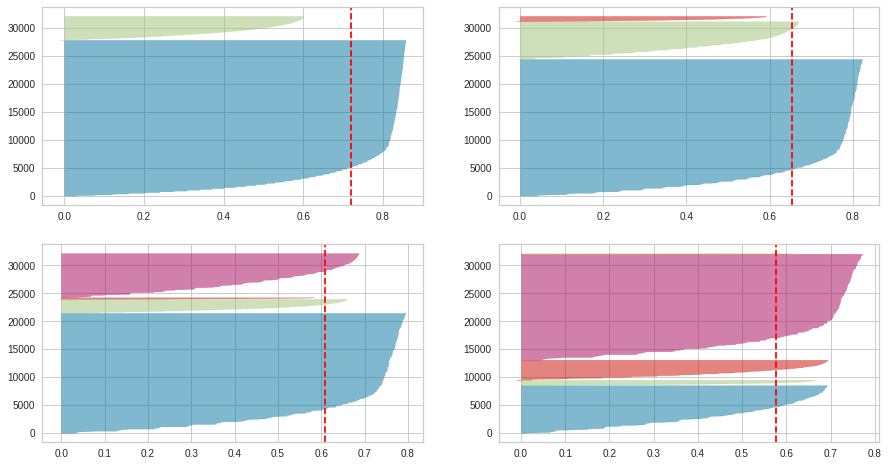

In [ ]:
# using n-cluster [2,3,4,5]
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=19)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

**Silhoutte**

In [ ]:
import sklearn.metrics as metrics
import sklearn.cluster as cluster

In [ ]:
SK = range(2,18)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df1).labels_
    score = metrics.silhouette_score(df1,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df1,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.7278306516175153
Silhouette score for k(clusters) = 3 is 0.6514719673240765
Silhouette score for k(clusters) = 4 is 0.6117769684306441
Silhouette score for k(clusters) = 5 is 0.5646111602891939
Silhouette score for k(clusters) = 6 is 0.5409405891087696
Silhouette score for k(clusters) = 7 is 0.5253684879268815
Silhouette score for k(clusters) = 8 is 0.4915159703086305
Silhouette score for k(clusters) = 9 is 0.48266827034781695
Silhouette score for k(clusters) = 10 is 0.45381546512229
Silhouette score for k(clusters) = 11 is 0.43710045179217877
Silhouette score for k(clusters) = 12 is 0.4132328632967716
Silhouette score for k(clusters) = 13 is 0.42063242720883376
Silhouette score for k(clusters) = 14 is 0.42085154867545344
Silhouette score for k(clusters) = 15 is 0.4149628957381475
Silhouette score for k(clusters) = 16 is 0.4305475486213388
Silhouette score for k(clusters) = 17 is 0.4156906201016529


In [ ]:
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

,Clusters,Sil Score
0,2,0.727831
1,3,0.651472
2,4,0.611777
3,5,0.564611
4,6,0.540941
5,7,0.525368
6,8,0.491516
7,9,0.482668
8,10,0.453815
9,11,0.437100


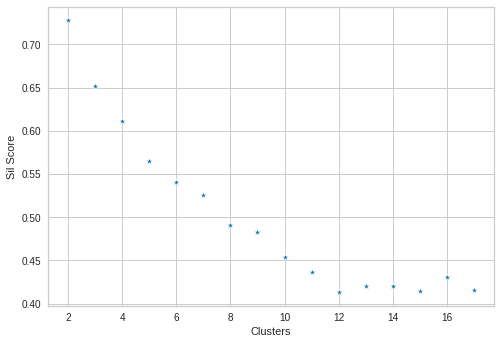

In [ ]:
sb.scatterplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="*")

Hasil k maksimum menurut nilai silhoutte score yaitu k = 2

# New Section

In [ ]:
druggie_x = df1.iloc[:, 0:5]
druggie_x.head()

,effectiveness_rating,number_of_times_prescribed
0,9,27
1,8,192
2,5,17
3,9,37
4,2,43


In [ ]:
x_array = np.array(druggie_x)

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.88888889, 0.03501946],
       [0.77777778, 0.24902724],
       [0.44444444, 0.02204929],
       ...,
       [0.88888889, 0.03242542],
       [0.77777778, 0.02853437],
       [0.11111111, 0.04539559]])

In [ ]:
kmeans = KMeans(n_clusters = 2, random_state=10)

In [ ]:
kmeans.fit(x_scaled)

KMeans(n_clusters=2, random_state=10)

In [ ]:
print(kmeans.cluster_centers_)

[[0.88365012 0.04285628]
 [0.1544905  0.0204267 ]]


In [ ]:
df1["Cluster"] = kmeans.labels_

In [ ]:
df1

,effectiveness_rating,number_of_times_prescribed,Cluster
0,9,27,0
1,8,192,0
2,5,17,1
3,9,37,0
4,2,43,1
...,...,...,...
32160,9,89,0
32161,6,0,0
32162,9,25,0
32163,8,22,0


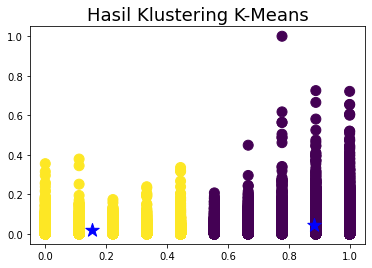

In [ ]:
plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = df1.Cluster, marker = "o",
            alpha = 1,)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], c = "blue", s = 200, alpha = 1,
            marker = "*")
plt.title("Hasil Klustering K-Means", fontsize = 18)

plt.show()

In [ ]:
cluster0 = df1[df1.Cluster==0]
cluster1 = df1[df1.Cluster==1]

Text(0.5, 1.0, 'Kluster 1')

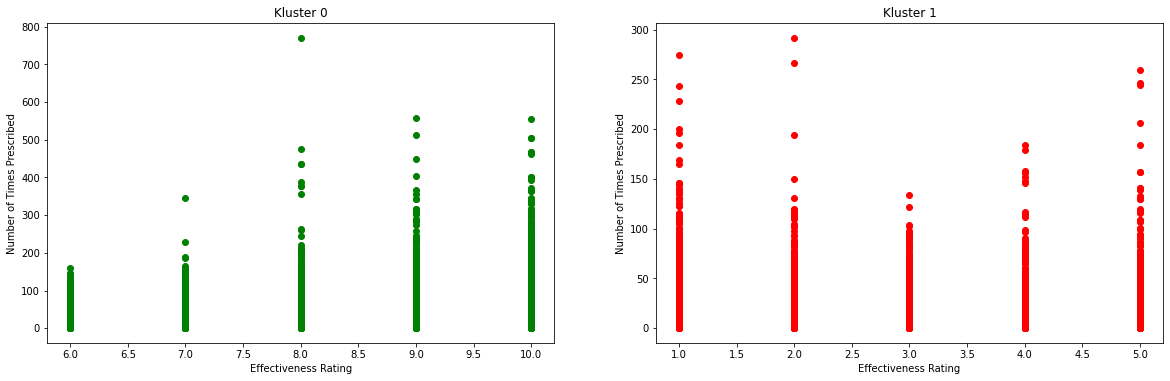

In [ ]:
plt.figure(figsize=(20,20)) #'effectiveness_rating', 'number_of_times_prescribed'
plt.subplot(3,2,1)
plt.scatter(cluster0.effectiveness_rating,cluster0['number_of_times_prescribed'],color='green')
plt.xlabel('Effectiveness Rating')
plt.ylabel('Number of Times Prescribed')
plt.title('Kluster 0')

plt.subplot(3,2,2)
plt.scatter(cluster1.effectiveness_rating,cluster1['number_of_times_prescribed'],color='red')
plt.xlabel('Effectiveness Rating')
plt.ylabel('Number of Times Prescribed')
plt.title('Kluster 1')